# BigMart Sales Prediction

## Project Overview



- Sales forecasting enables businesses to allocate resources for future growth while managing cash flow properly. Sales forecasting also assists firms in precisely estimating their expenditures and revenue, allowing them to predict their short- and long-term success. 

- Retail Sales Forecasting also assists retailers in meeting customer expectations by better understanding consumer purchasing trends. This results in more efficient use of shelf and display space within the retail establishment and optimal use of inventory space.
The Bigmart sales forecast project can help you comprehend project creation in a professional atmosphere. This project entails extracting and processing data in the Amazon Redshift database before further processing and building various machine-learning models for sales prediction. 

- We will study several data processing techniques, exploratory data analysis, and categorical correlation with Chi-squared, Cramer’s v tests, and ANOVA. In addition to basic statistical models like Linear Regression, we will learn how to design cutting-edge machine-learning models like Gradient Boosting and Generalized Additive Models. We will investigate splines and multivariate adaptive regression splines (MARS), as well as ensemble techniques like model stacking and model blending, and evaluate these models for the best results.

### Objective 
- This project aims to build and evaluate different predictive models and determine the sales of each product at a particular store. This analysis will help BigMart understand the properties of products and stores, which are crucial in increasing sales and developing better business strategies.

---





## Outcomes

* Understanding the sales prediction problem statement
* Performing data exploration with Amazon Redshift 
* Understanding SQL queries for data preprocessing
* Data Cleaning and Imputation with SQL
* Exploratory Data Analysis on Categorical and Continuous Data
* Understand Correlation Analysis
* Categorical Correlation with Chi-squared and Cramer’s V Tests
* Correlation between Categorical and Target Variables with ANOVA
* Label Encoding for Categorical Variables
* Linear Regression Implementation
* Elastic Net Implementation
* Random Forest Implementation
* Extra Trees Implementation
* Gradient Boosting Implementation
* Multi-Layer Perceptron Implementation
* Splines and Multivariate Adaptive Regression Splines (MARS) Implementation
* Implement Generalized Additive Models - LinearGAM, PoissonGAM, GammaGAM
* Understand and Implement Voting Regressor
* Understand Stacking and Blending Models
* Implement Stacking Regressor
* Implement Model Blending from Scratch
* Evaluate Models with Regression Metric - R-squared


## **Approach**

* Data Exploration with Amazon Redshift
* Data Cleaning and Imputation
* Exploratory Data Analysis
  * Categorical Data
  * Continuous Data
  * Correlation
    * Pearson’s Correlation
    * Chi-squared Test and Contingency Tables
    * Cramer’s V Test
    * One way ANOVA
* Feature Engineering
  * Outlet Age
  * Label Encoding for Categorical Variables
* Data Split
* Model Building and Evaluation
  * Linear Regressor
  * Elastic Net Regressor
  * Random Forest Regressor
  * Extra Trees Regressor
  * Gradient Boosting Regressor
  * MLP Regressor
  * Multivariate Adaptive Regression Splines (MARS)
  * Spline Regressor
  * Generalized Additive Models - LinearGAM, PoissonGAM, GammaGAM
  * Voting Regressor
  * Stacking Regressor
  * Model Blending


## **Important Libraries**
 
* **pyGAM**: pyGAM is a package for building Generalized Additive Models in Python, with an emphasis on modularity and performance. The API will be immediately familiar to anyone with experience of scikit-learn or scipy. Refer to [documentation](https://pygam.readthedocs.io/en/latest/) for more information.

* **py-earth**: The py-earth package implements Multivariate Adaptive Regression Splines using Cython and provides an interface that is compatible with scikit-learn's Estimator, Predictor, Transformer, and Model interfaces. Refer to [repository](https://github.com/scikit-learn-contrib/py-earth) for more information.

* **redshift_connector**: redshift_connector is the Amazon Redshift connector for Python. Easy integration with pandas and numpy, as well as support for numerous Amazon Redshift specific features help you get the most out of your data. Refer to [documentation](https://pypi.org/project/redshift-connector/) for more information.

---


## **Install Packages**

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install redshift_connector --quiet --exists-action i
!pip install numpy==1.23.5 --quiet
!pip install pandas==1.5.2 --quiet
!pip install matplotlib==3.6.2 --quiet
!pip install scikit-learn==1.2.0 --quiet
!pip install pygam==0.8.0 --quiet
!pip install projectpro --upgrade --quiet

## **Data Reading from Different Sources**

#### **1. Local files**
 
In many cases, the data is stored in local system. To read the data from the local system, specify the correct path and filename.
* **CSV format**
 
Comma-separated values, also known as CSV, is a specific way to store data in a table structure format.
The data used in this project is stored in a CSV file.
Click [here](https://s3.amazonaws.com/projex.dezyre.com/predict-big-mart-sales/materials/data.zip) to download the data used in this project.
 
Use following code to read data from csv file using pandas. 
```
import pandas as pd
csv_file_path= "D:/ProjectPro/BigMart Sales Prediction ML Project in Python/data/train_kOBLwZA.csv"
df = pd.read_csv(csv_file_path)
```
With appropriate csv_file_path, pd.read_csv() function will read the data and store it in df variable.
 
If you get *FileNotFoundError or No such file or directory*, try checking the path provided in the function. It's possible that python is not able to find the file or directory at a given location.
 
---

#### **2. Database**
 
Most organization store their data in databases such as [MySQL](https://www.mysql.com/) or [Postgres](https://www.postgresql.org/). The data can be accessed by secret credentials, which will be in the following format.
```
host = "host address"
database= "bigmart"
user = "ProjectPro"
password = "xyz"
```
MySQL is an open-source relational database management system.
 
In this project, we will demonstrate how to connect python to a MySQL server to fetch the data.
We will use the [pymysql](https://pypi.org/project/PyMySQL/) library to connect to the MySQL server.
 



---

In [2]:
# Import libraries 
import redshift_connector
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import projectpro
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
projectpro.checkpoint('362665')

## **Data Reading and Exploration with Redshift**

#### **Connect to Redshift Cluster**

In [ ]:
'''conn = redshift_connector.connect(
     host='host',
     database='database',
     user='user',
     password='password',
     port=1234
)'''

#### **Fetch entire data**

In [ ]:
'''query = "select * from public.data"
data = pd.read_sql(query, conn)'''

## **Data Dictionary**
The BigMart sales prediction dataset contains 2013's annual sales records for 1559 products across ten stores in different cities. Such vast data can reveal insights about apparent customer preferences as a specific product and store attributes have been defined in the dataset. 

* item_identifier: unique identification number for particular items
* item_weight: weight of the items
* item_fat_content: fat content in the item such as low fat and regular fat
* item_visibility: visibility of the product in the outlet
* item_type: category of the product such as Dairy, Soft Drink, Household, etc
* item_mrp: Maximum retail price of the product
* outlet_identifier: unique identification number for particular outlets	
* outlet_establishment_year: the year in which the outlet was established
* outlet_size: the size of the outlet, such as small, medium, and high
* outlet_location_type: location type in which the outlet is located, such as Tier 1, 2 and 3
* outlet_type: type of the outlet such as grocery store or supermarket
* item_outlet_sales: overall sales of the product in the outlet

#### **Find out rows where Item weight is missing**

In [ ]:
'''query = "select * from public.data where item_weight is null"
data = pd.read_sql(query, conn)
data'''

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDN52,None,Regular,0.130932,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1,FDK57,None,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
2,FDE52,None,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
3,FDQ60,None,Regular,0.191500,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


#### **How to fill the missing rows with respect to values from other columns**

In [ ]:
'''cursor = conn.cursor()

sql_string_update = """update public.data1 
                        set "item_weight" = b.maxweight
                        from public.data1 a
                        inner join (
                        select "item_identifier", max("item_weight") as maxweight
                        from public.data1
                        group by "item_identifier"
                        ) b on a."item_identifier" = b."item_identifier";
                        """

sql_ = sql_string_update.format('Null')

cursor.execute(sql_string_update)

conn.commit()

#conn.close()'''

#### **To fill missing values by a certain value**

In [ ]:
'''cursor = conn.cursor()

sql_string_update = """UPDATE public.data SET "outlet_size" = {0} WHERE "outlet_size" = {1};"""

sql_ = sql_string_update.format("'Small'","''")

cursor.execute(sql_)

conn.commit()

#conn.close()'''

In [ ]:
'''query = "select * from public.data"
data = pd.read_sql(query, conn)
data'''

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
4,FDP36,10.39,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,NCH43,8.42,Low Fat,0.070712,Household,216.4192,OUT045,2002,Small,Tier 2,Supermarket Type1,3020.0688
8519,FDW31,11.35,Regular,0.043245,Fruits and Vegetables,199.4742,OUT045,2002,Small,Tier 2,Supermarket Type1,2587.9646
8520,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,Small,Tier 3,Grocery Store,424.7804
8521,FDA01,15.00,Regular,0.054488,Canned,57.5904,OUT045,2002,Small,Tier 2,Supermarket Type1,468.7232


---

## **Data Reading in Python**

In [3]:
# Loading Train and Test data
data = pd.read_csv("../data/train_kOBLwZA.csv")
test_data = pd.read_csv("../data/test_t02dQwI.csv")

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


8523 entries in the training set, on which we will build our model, setting aside the test data for post modelling testing.

## **Data Preprocessing in Python**

In [6]:
# Impute missing 'Item_Weight' values with the maximum values within the same 'Item_Identifier' group
data['Item_Weight'] = data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('max'))


In [7]:
# Impute missing 'Outlet_Size' values with "Small"
data['Outlet_Size'] = data['Outlet_Size'].fillna("Small")


In [9]:
# Check unique values in the 'Outlet_Size' column
unique_outlet_sizes = data['Outlet_Size'].unique()


array(['Medium', 'Small', 'High'], dtype=object)

In [10]:
# Check information about the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
# Delete rows with missing values in the 'Item_Weight' column by selecting non-null rows
df = data[data['Item_Weight'].notna()]


In [13]:
# again check the information for non null count
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [14]:
# Calculate and display the value counts for different categories in the 'Item_Fat_Content' column
value_counts = df['Item_Fat_Content'].value_counts()


Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
# Replace specific values in 'Item_Fat_Content' column with standardized forms
df.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)

# Check and display the updated value counts
value_counts = df['Item_Fat_Content'].value_counts()


Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

In [16]:
# Calculate and display the value counts for different categories in the 'Item_Type' column
value_counts = df['Item_Type'].value_counts()


Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

---

## **Exploratory Data Analysis**


<AxesSubplot: xlabel='Outlet_Size', ylabel='count'>

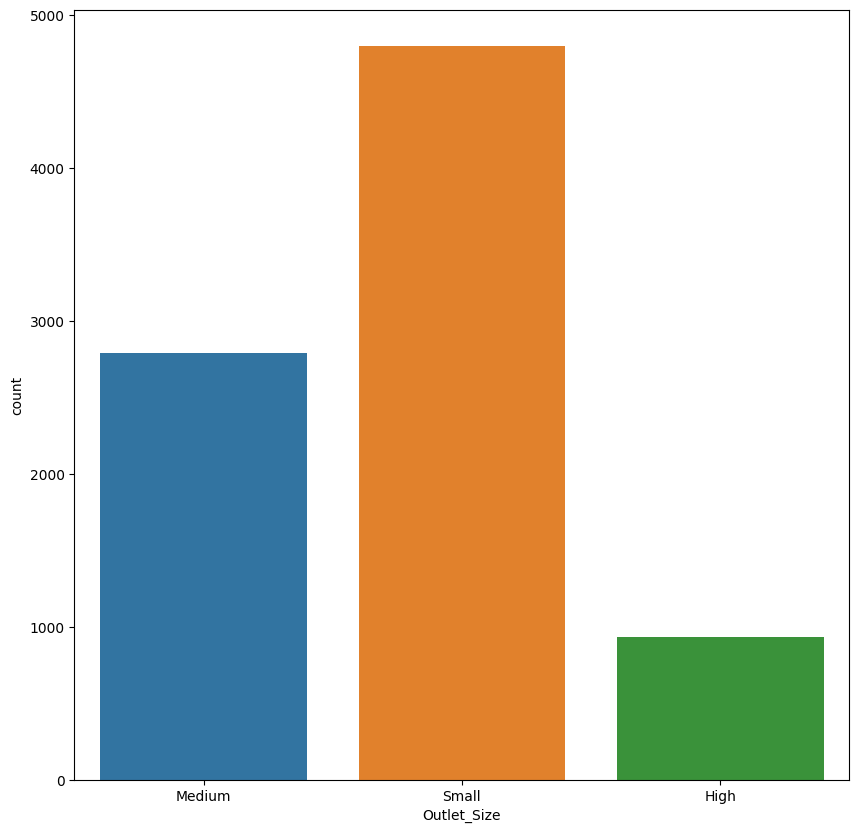

In [17]:
# Create a count plot for the 'Outlet_Size' column
plt.figure(figsize=(10, 10))
sns.countplot(x='Outlet_Size', data=df)

- It is visible that the small outlet size stores are much more in number.

<AxesSubplot: xlabel='Outlet_Type', ylabel='count'>

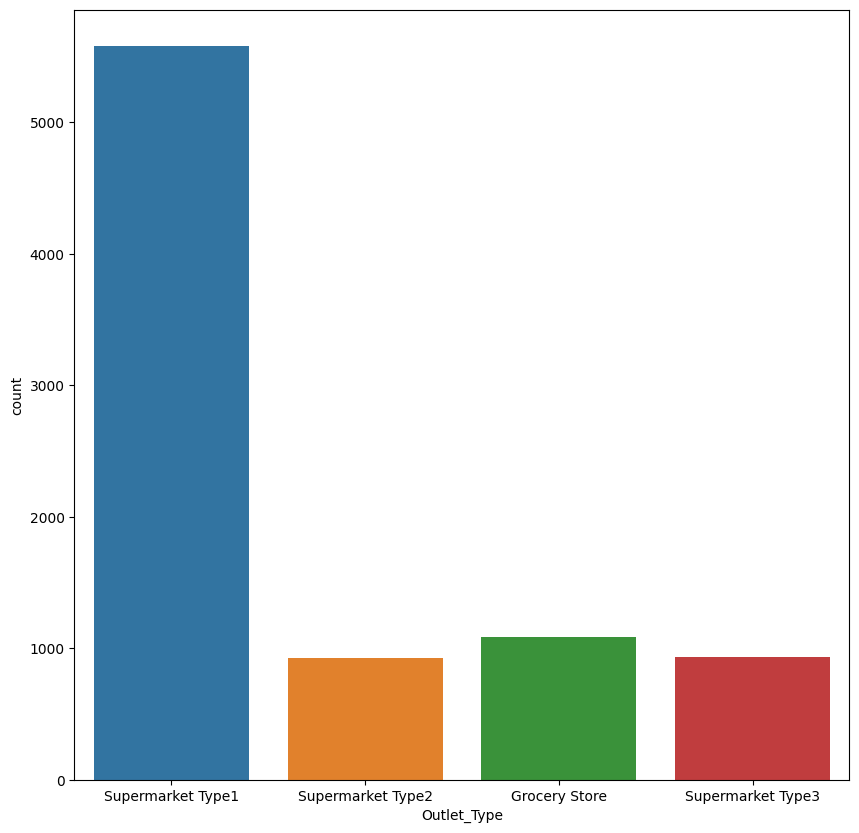

In [18]:
# Create a count plot for the 'Outlet_type' column 
plt.figure(figsize=(10,10))
sns.countplot(x='Outlet_Type',data=df)

- Supermarket Type1 is the most frequent outlet type in the data.

<AxesSubplot: xlabel='Outlet_Establishment_Year', ylabel='count'>

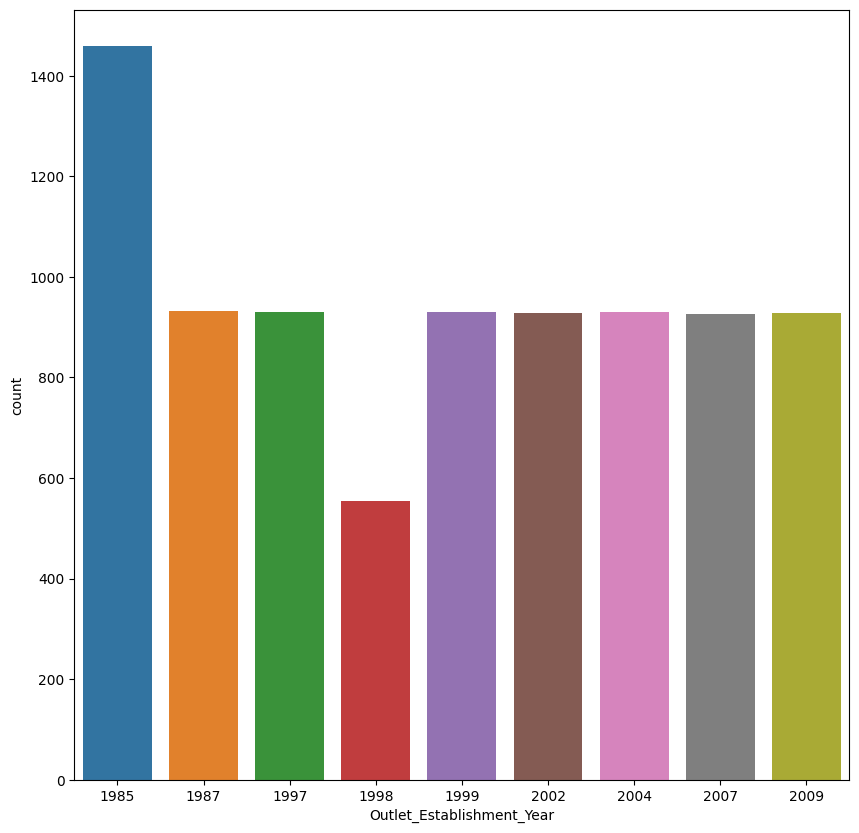

In [19]:
# Create a count plot for the 'Outlet_Establishment_Year' column
plt.figure(figsize=(10, 10))
sns.countplot(x='Outlet_Establishment_Year', data=df)


- Most stores were opened in the year 1985 and least in 1998.

<AxesSubplot: xlabel='Item_Weight', ylabel='Density'>

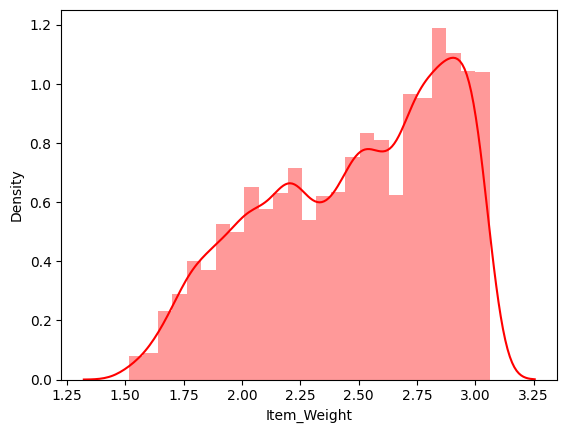

In [20]:
# Create a weight distribution plot using the natural logarithm of 'Item_Weight'
sns.distplot(np.log(df['Item_Weight']), color='red')


<AxesSubplot: xlabel='Item_Visibility', ylabel='Density'>

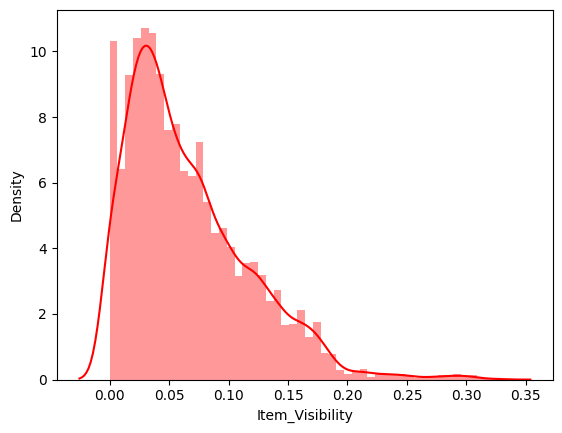

In [21]:
# Create a distribution plot for the 'Item_Visibility' column
sns.distplot(df['Item_Visibility'], color='red')


<AxesSubplot: xlabel='Item_MRP', ylabel='Density'>

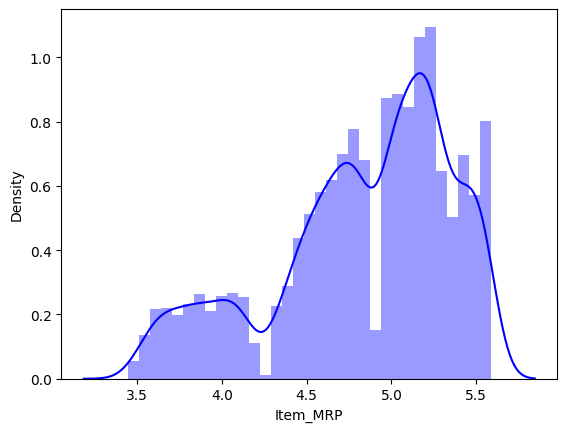

In [23]:
# Create a distribution plot for the 'Item_MRP' column after applying the natural logarithm
sns.distplot(np.log(df['Item_MRP']), color='blue')


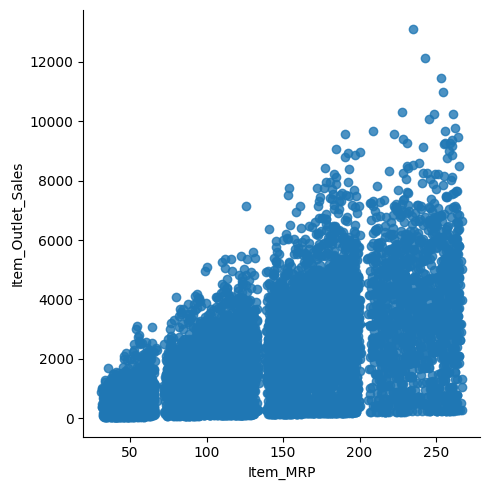

In [27]:
# Create a scatter plot with a linear regression line
sns.lmplot(data=df, x="Item_MRP", y="Item_Outlet_Sales")


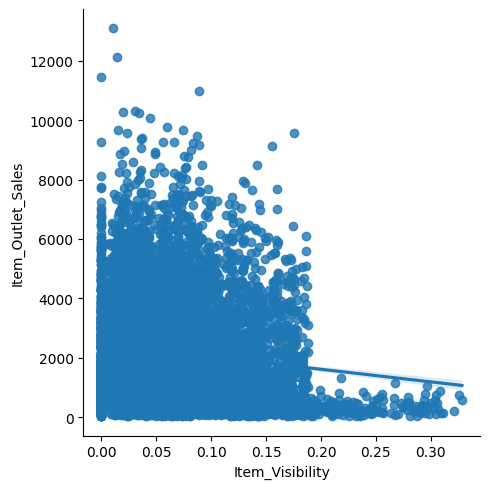

In [28]:
# Create a scatter plot with a linear regression line
sns.lmplot(data=df, x="Item_Visibility", y="Item_Outlet_Sales")


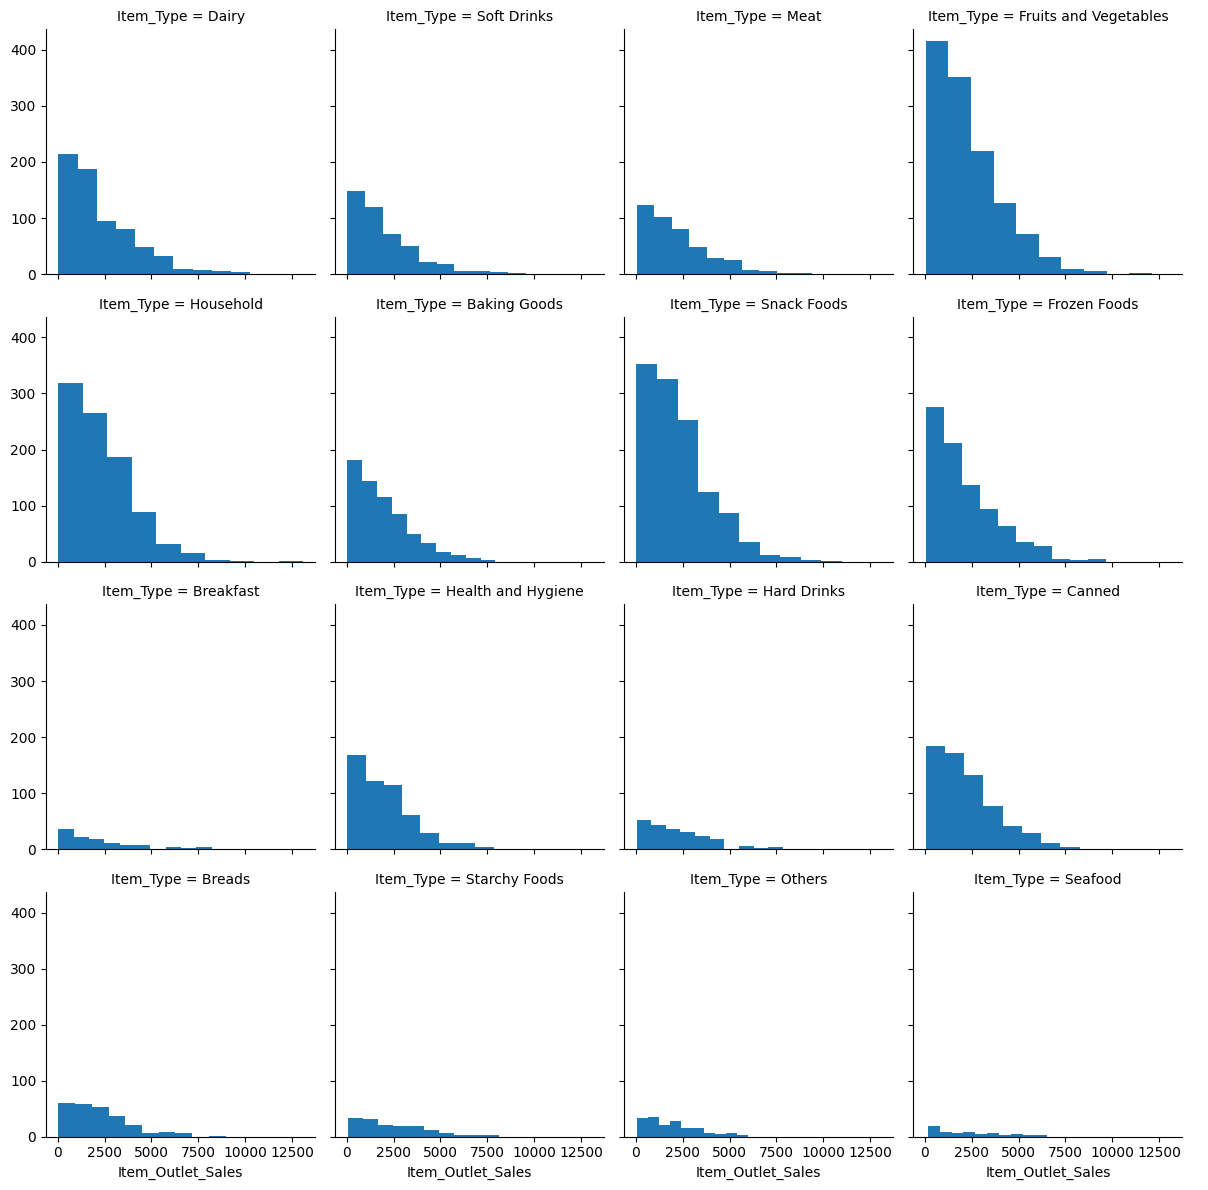

In [30]:
# Create a FacetGrid with histograms for 'Item_Outlet_Sales' by 'Item_Type'
sns.FacetGrid(df, col='Item_Type', col_wrap=4)\
    .map(plt.hist, 'Item_Outlet_Sales')\
    .add_legend()


### **Correlation**
 



<AxesSubplot: >

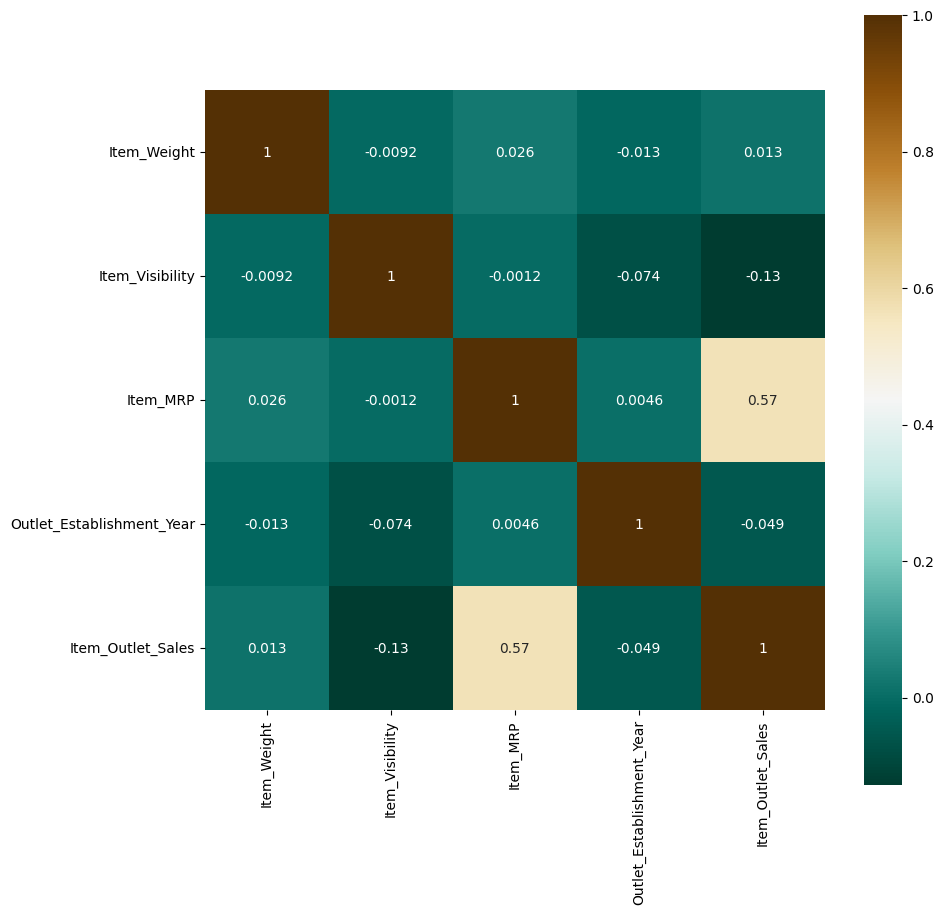

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap of correlations
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cbar=True, square=True, annot=True, cmap='BrBG_r')


### **Categorical Correlation**

#### **Chi Squared Test**

A sample's distribution of a categorical variable must frequently be compared to the distribution of a categorical variable in another sample.

The chi squared test of independence, often known as the chi squared test of association, is used to detect whether or not categorical variables are related.



In [33]:
# Create a cross-tabulation between 'Outlet_Size' and 'Outlet_Location_Type'
cross_tab = pd.crosstab(index=df['Outlet_Size'], columns=df['Outlet_Location_Type'])
print(cross_tab)


Outlet_Location_Type  Tier 1  Tier 2  Tier 3
Outlet_Size                                 
High                       0       0     932
Medium                   930       0    1860
Small                   1457    2785     555


In [34]:
# cross tab
cross_tab

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1860
Small,1457,2785,555


In [35]:
# Perform a chi-squared test on the cross-tabulation table
result = chi2_contingency(cross_tab)


In [36]:
# H0 is - there is no significance
result

(4804.376637943735,
 0.0,
 4,
 array([[ 261.14379622,  304.68599601,  366.17020777],
        [ 781.75020542,  912.0964902 , 1096.15330438],
        [1344.10599836, 1568.21751379, 1884.67648785]]))

In [37]:
print("The p value is",result[1])

The p value is 0.0


#### **Cramer's V Test**

- Cramer's V is a method for assessing the strength of a relationship between two variables. Your variables of interest should be categorical, with two or more unique values per category, in order to use it. 

- When there is more than a 2 X 2 contingency, Cramer's V is employed to investigate the relationship between two category variables (e.g. 2 X 3). 
Cramer's V denotes the relationship or correlation between two variables.

In [38]:
def cramers_v(var1, var2):
    # Create a contingency table
    cross_tab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
    
    # Calculate the chi-squared statistic
    chi2_stat = chi2_contingency(cross_tab)[0]
    
    # Calculate the total number of observations
    total_obs = np.sum(cross_tab)
    
    # Determine the minimum of the number of rows and columns in the contingency table
    min_dimension = min(cross_tab.shape) - 1
    
    # Calculate Cramer's V statistic
    cramers_v = chi2_stat / (total_obs * min_dimension)
    
    return cramers_v


In [39]:
# Create a LabelEncoder instance
label = preprocessing.LabelEncoder()

# Create an empty DataFrame to store the encoded data
data_encoded = pd.DataFrame()


In [41]:
for i in df[['Outlet_Type', 'Outlet_Size', 'Outlet_Location_Type']].columns:
    # Use the LabelEncoder to encode the categorical columns
    data_encoded[i] = label.fit_transform(df[i])


In [42]:
data_encoded

,Outlet_Type,Outlet_Size,Outlet_Location_Type
0,1,1,0
1,2,1,2
2,1,1,0
3,0,2,2
4,1,0,2
...,...,...,...
8518,1,0,2
8519,1,2,1
8520,1,2,1
8521,2,1,2


In [43]:
var4 = []  # Initialize an empty list

for var1 in data_encoded:
  col = []  # Initialize an empty list for each var1
  for var2 in data_encoded:
    cramers = cramers_v(data_encoded[var1], data_encoded[var2])  # Calculate Cramer's V
    col.append(round(cramers, 2))  # Append rounded Cramer's V to the col list
  var4.append(col)  # Append the col list to var4

cramer_results = np.array(var4)  # Convert var4 to a NumPy array

result_cv = pd.DataFrame(cramer_results, columns=data_encoded.columns, index=data_encoded.columns)  # Create a DataFrame with Cramer's V results


In [44]:
result_cv

,Outlet_Type,Outlet_Size,Outlet_Location_Type
Outlet_Type,1.00,0.32,0.28
Outlet_Size,0.32,1.00,0.28
Outlet_Location_Type,0.28,0.28,1.00


#### **One Way ANOVA**

ANOVA is an abbreviation for Analysis of Variances, which evaluates the differences between group means. It's a statistical hypothesis test that looks to see if the means of at least two populations differ. To run ANOVA, we require at least one continuous variable and one categorical variable that separates your data into comparison groups. The term "analysis of variances" refers to how the test uses variances to determine whether the means are different.

In [45]:
# Finding correlation between 1 numeric and 1 catergorical -> 1WAY ANOVA

In [46]:
# H0 -> there is no corelation
# there is no corelation between outlet_type and sales
# p value <0.05-> Reject my null hypothesis

In [47]:
# Group 'Item_Outlet_Sales' by 'Outlet_Location_Type' and create lists
anova_prep_res = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].apply(list)  

print(anova_prep_res)


Outlet_Location_Type
Tier 1    [3735.138, 2097.27, 1516.0266, 2187.153, 1589....
Tier 2    [1076.5986, 4710.535, 2748.4224, 1587.2672, 83...
Tier 3    [443.4228, 732.38, 994.7052, 556.6088, 343.552...
Name: Item_Outlet_Sales, dtype: object


In [48]:
# Perform one-way ANOVA on the prepared data
anovaresults = f_oneway(*anova_prep_res)  


In [49]:
# Print the p-value from the ANOVA results
print("The p value is", anovaresults[1])  


The p value is 7.025683417882415e-24


In [50]:
anovaresults

F_onewayResult(statistic=53.64761754128398, pvalue=7.025683417882415e-24)

---

## **Feature Engineering**

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Outlet Age**

In [52]:
# Dropped 4 rows from data and saved it in df

# Calculate the 'Outlet_Age' by subtracting the 'Outlet_Establishment_Year' from 2022
df['Outlet_Age'] = 2022 - df['Outlet_Establishment_Year']

# Drop the 'Outlet_Establishment_Year' column from the DataFrame
df = df.drop(columns=['Outlet_Establishment_Year'])

# Display the first few rows of the modified DataFrame
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,35


In [53]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Outlet_Age'],
      dtype='object')

**Label Encoding**

In [55]:
# Initialize a LabelEncoder
le = LabelEncoder()

# List of columns to be encoded
col_encode = ['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Encode the specified columns using LabelEncoder
for i in col_encode:
    df[i] = le.fit_transform(df[i])

# Create a new DataFrame by dropping the 'Item_Identifier' column
df_new = df.drop(columns=['Item_Identifier'])

# Perform one-hot encoding on the new DataFrame
df_new = pd.get_dummies(df_new)

# Display the first few rows of the transformed DataFrame
df_new.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0,0.016047,249.8092,9,1,0,1,3735.1380,23,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,3,1,2,2,443.4228,13,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,141.6180,9,1,0,1,2097.2700,23,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,182.0950,0,2,2,0,732.3800,24,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,1,0,2,1,994.7052,35,...,0,0,0,1,0,0,0,0,0,0


---

## **Split data**

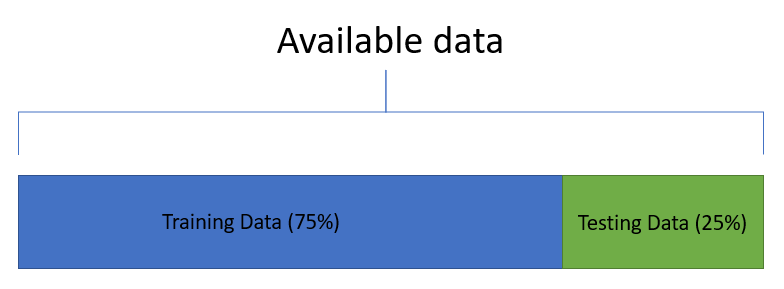


The data points are divided into two datasets, train and test, in a train test split method. The train data is used to train the model, and the model is then used to predict on the test data to see how the model performs on unseen data and whether it is overfitting or underfitting.

<br>

In [56]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = df_new.drop(columns=['Item_Outlet_Sales'])
y = df_new['Item_Outlet_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22222)


---

## **Modelling**

In [57]:
# Define a list of models
models = [
    ('lr', LinearRegression()),           # Linear Regression
    ('ElasticNet', ElasticNet()),         # Elastic Net Regression
    ('RF', RandomForestRegressor()),       # Random Forest Regression
    ('ETR', ExtraTreesRegressor()),       # Extra Trees Regression
    ('GBM', GradientBoostingRegressor()), # Gradient Boosting Regression
    ('MLP', MLPRegressor())               # Multi-layer Perceptron (Neural Network) Regression
]


In [58]:
# Define a function for model selection and cross-validation
def model_selection_function(x, y, cross_folds, model):
    scores = []  # List to store cross-validation scores
    names = []   # List to store model names

    # Iterate through the list of model tuples
    for i, j in model:
        cv_scores = cross_val_score(j, x, y, cv=cross_folds, n_jobs=-1)  # Perform cross-validation
        scores.append(cv_scores)  # Store the cross-validation scores
        names.append(i)          # Store the model names

    # Print the model names and their mean cross-validation scores
    for k in range(len(scores)):
        print(names[k], scores[k].mean())


In [59]:
# Perform model selection and cross-validation on the training data
model_selection_function(X_train, y_train, 3, models)


lr 0.4958178267370769
ElasticNet 0.47308329416120437
RF 0.5506369506161392
ETR 0.49725421385589685
GBM 0.590383608850568
MLP 0.4791630380241734


In [60]:
# Perform model selection and cross-validation on the training data
model_selection_function(X_train,y_train,5,models)

lr 0.49647824576884625
ElasticNet 0.47339485984955526
RF 0.5552208035367644
ETR 0.5063239579605238
GBM 0.5909205951502939
MLP 0.4969676353053412


### **Multivariate Adaptive Regression Spline**

MARS, or Multivariate Adaptive Regression Splines, is a nonlinear regression approach for difficult problems.

The approach includes identifying a set of basic linear functions that, when combined, produce the best predicted performance. MARS is thus a type of ensemble of simple linear functions that can perform well on difficult regression problems with many input variables and complex non-linear interactions.
The MARS algorithm works by identifying a series of simple piecewise linear functions that characterise the data and combining them to make a forecast. In other ways, the model is a collection of linear functions.

In [ ]:
#Pyearth --> MARS --> Spline Regression
!pip install git+https://github.com/scikit-learn-contrib/py-earth@v0.2dev --quiet

In [63]:
# Import the Earth regression model from pyearth library
from pyearth import Earth

# Initialize an Earth regression model with specified parameters
model = Earth(max_degree=5, endspan=20)

# Perform cross-validation on the training data using the Earth model
scores = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1)


In [64]:
scores

array([0.60280134, 0.61560418, 0.58055522, 0.59529722, 0.58615293])

In [65]:
scores.mean()

0.5960821785309107

In [66]:
from sklearn.preprocessing import PolynomialFeatures,SplineTransformer
from sklearn.pipeline import make_pipeline

# Create a pipeline with a SplineTransformer and LinearRegression
spline_model = make_pipeline(SplineTransformer(n_knots=3, degree=5), LinearRegression())

# Perform cross-validation on the training data using the spline model
scores = cross_val_score(spline_model, X_train, y_train, cv=5, n_jobs=-1)

# Calculate the mean of the cross-validation scores
mean_score = scores.mean()


0.5548232410168323

### **Generalized Additive Models**

GAMs (Generalised Additive Models) are an adaptation that allows us to model non-linear data while keeping it explainable. A GAM is a linear model that differs from Generalised Linear Models such as Linear Regression. Non-linear features can be learned by a GAM. GAMs disregard the requirement that the relationship be a simple weighted sum and instead assume that the outcome can be represented by a sum of arbitrary functions of each feature.

It is quite similar to the regression model formula, however instead of using BiXi (simple weighted sum), it utilises f1(X1) (flexible function). It is still, at its foundation, the sum of feature effects. Instead of modelling all relationships, we can select particular features to model relationships because they also support the linear effect.

Splines are learning functions that can be used to learn any function. The feature functions are constructed using penalised B splines, which allow us to automatically model non-linear connections without having to manually experiment with numerous transformations on each variable. GAMs are generalised linear models that allow non-linear features functions while retaining additivity. Because the model is additive, it is simple to investigate the effect of each X i on Y while maintaining all other predictors constant.

Read the [pyGAM documentation](https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html) to know more.



In [ ]:
### GAM ####
# Generalized Additive Model

!pip install pygam --quiet

In [70]:
# Import necessary classes from the pygam library
from pygam import PoissonGAM

# Initialize a Poisson Generalized Additive Model (GAM) and perform a grid search
gam = PoissonGAM().gridsearch(X_train.values, y_train)

# Print a summary of the model
gam.summary()


  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:50 ETA:   0:08:25


did not converge


 18% (2 of 11) |####                     | Elapsed Time: 0:01:58 ETA:   0:10:06


did not converge


 27% (3 of 11) |######                   | Elapsed Time: 0:03:06 ETA:   0:09:04


did not converge


 36% (4 of 11) |#########                | Elapsed Time: 0:04:09 ETA:   0:07:26


did not converge


 45% (5 of 11) |###########              | Elapsed Time: 0:05:21 ETA:   0:07:12


did not converge


 54% (6 of 11) |#############            | Elapsed Time: 0:06:40 ETA:   0:06:34


did not converge


 63% (7 of 11) |###############          | Elapsed Time: 0:08:07 ETA:   0:05:46


did not converge


 72% (8 of 11) |##################       | Elapsed Time: 0:09:38 ETA:   0:04:32


did not converge


 81% (9 of 11) |####################     | Elapsed Time: 0:10:50 ETA:   0:02:24


did not converge


 90% (10 of 11) |#####################   | Elapsed Time: 0:12:18 ETA:   0:01:28


did not converge


100% (11 of 11) |########################| Elapsed Time: 0:13:52 Time:  0:13:52


did not converge
PoissonGAM                                                                                                
=============================================== ==========================================================
Distribution:                       PoissonDist Effective DoF:                                      82.995
Link Function:                          LogLink Log Likelihood:                              -1437333.0893
Number of Samples:                         6815 AIC:                                          2874832.1687
                                                AICc:                                         2874834.2903
                                                UBRE:                                             414.7187
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.6814
Feature Function    

#### Approach

1) Use existing set to do predictions on test set and see the results and then decide further --> other stuff like model blending, stacking and generalization

2) Model blending, stacking --> Testing on test data

---

### **Model Ensembling Starts Here**

### **Voting Regressor**

A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction.

In [73]:
# Creates averages of model predictions

# Import necessary classes from scikit-learn for creating a voting ensemble of regressors
from sklearn.ensemble import VotingRegressor

# Initialize individual regression models
reg1 = LinearRegression()
reg2 = GradientBoostingRegressor()
reg3 = MLPRegressor()

# Create a Voting Regressor ensemble with specified estimators
voting_regress = VotingRegressor(estimators=[('LR', reg1), ('GBM', reg2), ('MLP', reg3)])

# Perform cross-validation on the training data using the voting ensemble
scores = cross_val_score(voting_regress, X_train, y_train, cv=3)


In [74]:
print(scores)
print(scores.mean())

[0.56137098 0.52676572 0.56467648]
0.5509377247712267


### **Model Stacking**



Stacking, also known as Stacked Generalization, is a machine learning ensemble algorithm.

It use a meta-learning algorithm to find the optimum way to combine predictions from two or more base machine learning methods.

The advantage of stacking is that it can combine the capabilities of several high-performing models on a classification or regression job to create predictions that outperform any single model in the ensemble.

Unlike bagging, the models in stacking are often distinct (e.g., not all decision trees) and fit to the same dataset (e.g. instead of samples of the training dataset).
In contrast to boosting, a single model is utilised in stacking to learn how to optimally combine the predictions from the contributing models (e.g. instead of a sequence of models that correct the predictions of prior models).
A stacking model's architecture consists of two or more base models, also known as level-0 models, and a meta-model that aggregates the predictions of the base models, known as a level-1 model.

* Level-0 Models (Base-Models): These are models that are fitted to the training data and whose predictions are compiled.
* Level-1 Model (Meta-Model): Learns the optimum way to combine the predictions of the base models.
The meta-model is trained using out-of-sample data predictions given by base models.

In the case of regression, the outputs of the base models used as input to the meta-model can be real values, probability values, probability like values, or class labels.

The most popular method for producing the training dataset for the meta-model is k-fold cross-validation of the base models, with the out-of-fold predictions serving as the foundation for the meta-model training dataset.

In [75]:
# Initialize a Linear Regression model
reg1 = LinearRegression()

# Initialize a Gradient Boosting Regressor model
reg2 = GradientBoostingRegressor()

# Create a list of model tuples for potential estimators in an ensemble
estimators = [('LR', reg1), ('GBM', reg2)]


In [76]:
# Import necessary classes from scikit-learn for creating a Stacking Regressor ensemble
from sklearn.ensemble import StackingRegressor

# Initialize a level 1 estimator, which is MLPRegressor in this case
level_1_estimator = MLPRegressor()

# Create a Stacking Regressor ensemble with specified base estimators (estimators) and a final estimator (level_1_estimator)
stacking_model = StackingRegressor(estimators=estimators, final_estimator=level_1_estimator)


In [77]:
# Perform cross-validation on the training data using the stacking ensemble model
scores = cross_val_score(stacking_model, X_train, y_train, cv=3)


In [78]:
scores

array([0.60736875, 0.56728888, 0.59899729])

### **Model Blending**

Blending is an ensemble machine learning technique that employs a machine learning model to learn how to effectively integrate predictions from different ensemble member models. Blending is an extension of Stacking Generalization. The sole distinction is that in Blending, the k-fold cross validation procedure is not used to construct the meta-training model's data. Blending uses a "one-holdout set," or a small subset of the training data (validation) to make predictions that will be "stacked" to form the meta-training model's data. Predictions are also built from the test data to create the meta-model test data.

In [79]:
# Import necessary functions and libraries
from numpy import hstack
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Split the training data into a validation set
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=2222)

# Define a function to create and return a list of models
def list_models():
    models = []
    models.append(('LR', LinearRegression()))
    models.append(('GBR', GradientBoostingRegressor()))
    return models

# Define a function to fit all models and a meta-estimator
def fit_all_models(models, X_train, X_val, y_train, y_val):
    level_1_feat = []

    # Loop through the list of models
    for name, model in models:
        model.fit(X_train, y_train)
        y_hat = model.predict(X_val)
        y_hat = y_hat.reshape(len(y_hat), 1)
        level_1_feat.append(y_hat)

    # Combine the predictions from base models
    level_1_feat = hstack(level_1_feat)

    # Initialize and train the meta-estimator
    level_1_estimator = MLPRegressor()
    level_1_estimator.fit(level_1_feat, y_val)

    return level_1_estimator

# Define a function to make predictions using base models and the meta-estimator
def pred_data(models, blends, X_test):
    meta_model_X = []

    # Loop through the list of models
    for name, model in models:
        y_hat = model.predict(X_test)
        y_hat = y_hat.reshape(len(y_hat), 1)
        meta_model_X.append(y_hat)

    # Combine the predictions from base models for the test data
    meta_model_X = hstack(meta_model_X)

    # Make predictions using the meta-estimator
    return blends.predict(meta_model_X)

# Get the list of models
models = list_models()

# Fit all models and the meta-estimator on the validation set
model_blender = fit_all_models(models, X_train_1, X_val, y_train_1, y_val)

# Make predictions using base models and the meta-estimator on the training data
y_hat = pred_data(models, model_blender, X_train)


---

## **Model Evaluation**

In [80]:
from sklearn.metrics import r2_score

r2_score(y_train,y_hat)

0.630582189355684

In [81]:
scores=cross_val_score(model_blender,X_train,y_train,cv=3)

In [82]:
scores

array([0.4720012 , 0.45556442, 0.47941797])

In [84]:
# Use the pred_data function to make predictions on the test data using the blending model
y_pred = pred_data(models, model_blender, X_test)

# Calculate and print the R2 score for the blending model
print("R2 of Blending is")
print(r2_score(y_test, y_pred))

# Fit and predict with the stacking model
model_stack = stacking_model.fit(X_train, y_train)
y_pred = model_stack.predict(X_test)

# Calculate and print the R2 score for the stacking model
print("R2 of Stacking is")
print(r2_score(y_test, y_pred))

# Fit and predict with the Gradient Boosting Regressor (GBM) model
model_gbm = GradientBoostingRegressor()
model_gbm.fit(X_train, y_train)
y_pred = model_gbm.predict(X_test)

# Calculate and print the R2 score for the GBM model
print("R2 of GBM is")
print(r2_score(y_test, y_pred))


R2 of Blending is
0.6069217439513899
R2 of Stacking is
0.6103823798402186
R2 of GBM is
0.6098375340559932


In [85]:
# Install the pygam library if not already installed
# !pip install pygam

# Import necessary classes from the pygam library
from pygam import PoissonGAM

# Initialize a Poisson Generalized Additive Model (GAM) with 5 splines and perform a grid search
gam = PoissonGAM(n_splines=5).gridsearch(X_train.values, y_train)

# Make predictions using the trained Poisson GAM on the test data
y_pred = gam.predict(X_test.values)

# Calculate and print the R2 score to evaluate the model's performance
print(r2_score(y_test, y_pred))


  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:09 ETA:   0:01:34


did not converge


 18% (2 of 11) |####                     | Elapsed Time: 0:00:17 ETA:   0:01:15


did not converge


 27% (3 of 11) |######                   | Elapsed Time: 0:00:26 ETA:   0:01:07


did not converge


 36% (4 of 11) |#########                | Elapsed Time: 0:00:34 ETA:   0:00:58


did not converge


 45% (5 of 11) |###########              | Elapsed Time: 0:00:43 ETA:   0:00:51


did not converge


 54% (6 of 11) |#############            | Elapsed Time: 0:00:51 ETA:   0:00:42


did not converge


 63% (7 of 11) |###############          | Elapsed Time: 0:01:00 ETA:   0:00:34


did not converge


 72% (8 of 11) |##################       | Elapsed Time: 0:01:09 ETA:   0:00:27


did not converge


 81% (9 of 11) |####################     | Elapsed Time: 0:01:18 ETA:   0:00:18


did not converge


 90% (10 of 11) |#####################   | Elapsed Time: 0:01:31 ETA:   0:00:12


did not converge


100% (11 of 11) |########################| Elapsed Time: 0:01:44 Time:  0:01:44


did not converge
0.6119679799388373


In [86]:
# Initialize a Gradient Boosting Regressor (GBM) model
model_gbm = GradientBoostingRegressor()

# Perform cross-validation on the dataset using the GBM model
scores = cross_val_score(model_gbm, X, y, cv=5)


In [87]:
scores.mean()

0.5934706099465524

In [88]:
# Perform cross-validation on the entire dataset using the stacking model
scores = cross_val_score(stacking_model, X, y, cv=3)

# Calculate and print the mean of the cross-validation scores
mean_score = scores.mean()


<function ndarray.mean>

In [ ]:
'''
TO DO:

1) Save all encoders and models
2) Dagster - > DAG's
3) Data Validation tests
4) Missing Data - Fill it
5) Prediciton
6) Dumping results back to database
7) Deploying 

'''

## **Conclusion**

- In this project, we constructed and tested various predictive models to determine the sales of each product in a specific retailer. Using Chi-squared, Cramer's v tests, and ANOVA, we investigated data processing strategies, exploratory data analysis, and category correlation. 

- We learnt how to develop cutting-edge machine-learning models like Gradient Boosting and Generalized Additive Models in addition to basic statistical models like Linear Regression. 

- We explored splines and multivariate adaptive regression splines (MARS), as well as ensemble strategies such as model stacking and model blending, and compared their performance.
 

---